<a href="https://colab.research.google.com/github/dansarmiento/ai-agents-development-MS/blob/main/Semantic_Similarity_with_FAISS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Semantic Search

When we're looking to build a semantic search engine, it's important to start with the basics. Let's break down what semantic search is and why it's a game-changer in finding information.

## What is Semantic Search?

Semantic search transcends the limitations of traditional keyword searches by understanding the context and nuances of language in user queries. At its core, semantic search:

* Enhances the search experience by interpreting the intent and contextual meaning behind search queries.
* Delivers more accurate and relevant search results by analyzing the relationships between words and phrases within the search context.
* Adapts to user behavior and preferences, refining search results for better user satisfaction.

## How Semantic Search Works - The Simple Version

Now, how does this smart assistant do its job? It uses some clever tricks from a field called Natural Language Processing, or NLP for short. Here’s the simple version of the process:

1.  **Getting the Gist:** First up, the search engine listens to your query and tries to get the gist of it. Instead of just spotting keywords, it digs deeper to find the real meaning.
2.  **Making Connections:** Next, it thinks about all the different ways words can be related (like "doctor" and "physician" meaning the same thing). This helps it get a better sense of what you're asking for.
3.  **Picking the Best:** Finally, it acts like a librarian who knows every book in the library. It sorts through tons of information to pick what matches your query best, considering what you probably mean.

## The Technical Side of Semantic Search

After understanding the basics, let's peek under the hood at the technical engine powering semantic search. This part is a bit like math class, where we learn about vectors — no, not the ones you learned in physics, but something similar that we use in search engines.

### Vectors: The Language of Semantic Search

In the world of semantic search, a vector is a list of numbers that a computer uses to represent the meaning of words or sentences. Imagine each word or sentence as a point in space. The closer two points are, the more similar their meanings.

* **Creating Vectors:** We start by turning words or sentences into vectors using models like the Universal Sentence Encoder. It's like giving each piece of text its unique numerical fingerprint.
* **Calculating Similarity:** To find out how similar two pieces of text are, we measure how close their vectors are in space. This is done using mathematical formulas, such as cosine similarity, which tells us how similar or different two text fingerprints are.
* **Using Vectors for Search:** When you search for something, the search engine looks for the vectors closest to the vector of your query. The closest vectors represent the most relevant results to what you're asking.

### How Vectors Power Our Search

Vectors are powerful because they can capture the subtle meanings of language that go beyond the surface of words. Here's what happens in a semantic search engine:

1.  **Vectorization:** When we type in a search query, the engine immediately turns our words into a vector.
2.  **Indexing:** It then quickly scans through a massive index of other vectors, each representing different pieces of information.
3.  **Retrieval:** By finding the closest matching vectors, the engine retrieves information that's not just textually similar but semantically related.

- Understand the fundamentals of semantic search and its advantages over traditional search methods.
- Familiarize with the process of preparing text data for semantic analysis, including cleaning and standardization techniques.
- Learn how to utilize the Universal Sentence Encoder to convert text into high-dimensional vector space representations.
- Gain practical experience with FAISS (Facebook AI Similarity Search), an efficient library for indexing and searching high-dimensional vectors.
- Apply these techniques to build a fully functioning semantic search engine that can interpret and respond to natural language queries.



In [2]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 44.6 MB/s eta 0:00:00


In [13]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import faiss
import re
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Suppressing warnings for a cleaner output
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Understanding Vectorization and Indexing

Vectorization and indexing are key components of building a semantic search engine. Let's explore how they work using the Universal Sentence Encoder (USE) and FAISS.

## What does the Universal Sentence Encoder do?

The Universal Sentence Encoder (USE) takes sentences, no matter how complex, and turns them into vectors. These vectors are arrays of numbers that capture the essence of sentences. Here's why it's amazing:

* **Language Comprehension:** USE understands the meaning of sentences by considering the context in which each word is used.
* **Versatility:** It's trained on a variety of data sources, enabling it to handle a wide range of topics and sentence structures.
* **Speed:** Once trained, USE can quickly convert sentences to vectors, making it highly efficient.

### How does the Universal Sentence Encoder work?

The magic of USE lies in its training. It uses deep learning models to digest vast amounts of text. Here’s what it does:

1.  **Analyzes Words:** It looks at each word in a sentence and the words around it to get a full picture of their meaning.
2.  **Understands Context:** It pays attention to the order of words and how they're used together to grasp the sentence's intent.
3.  **Creates Vectors:** It converts all this understanding into a numeric vector that represents the sentence.

## What is FAISS and what does it do?

FAISS, developed by Facebook AI, is a library for efficient similarity search. After we have vectors from USE, we need a way to search through them quickly to find the most relevant ones to a query. FAISS does just that:

* **Efficient Searching:** It uses optimized algorithms to rapidly search through large collections of vectors.
* **Scalability:** It can handle databases of vectors that are too large to fit in memory, making it suitable for big data applications.
* **Accuracy:** It provides highly accurate search results, thanks to its advanced indexing strategies.

### How does FAISS work?

FAISS creates an index of all the vectors, which allows it to search through them efficiently. Here's a simplified version of its process:

1.  **Index Building:** It organizes vectors in a way that similar ones are near each other, making it faster to find matches.
2.  **Searching:** When you search with a new vector, FAISS quickly identifies which part of the index to look at for the closest matches.
3.  **Retrieving Results:** It then retrieves the most similar vectors, which correspond to the most relevant search results.

## Putting it all together:

With USE and FAISS, we have a powerful duo. USE helps us understand language in numerical terms, and FAISS lets us search through these numbers to find meaningful connections. Combining them, we create a semantic search engine that's both smart and swift.

# The 20 Newsgroups Dataset

In this project, we'll be using the 20 Newsgroups dataset, a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. It's a go-to dataset in the NLP community because it presents real-world challenges:

## What is the 20 Newsgroups Dataset?

* **Diverse Topics:** The dataset spans 20 different topics, from sports and science to politics and religion, reflecting the diverse interests of newsgroup members.
* **Natural Language:** It contains actual discussions, with all the nuances of human language, making it ideal for semantic search.
* **Prevalence of Context:** The conversations within it require understanding of context to differentiate between the topics effectively.

---

## How are we using the 20 Newsgroups Dataset?

1.  **Exploring Data:** We'll start by loading the dataset and exploring its structure to understand the kind of information it holds.
2.  **Preprocessing:** We'll clean the text data, removing any unwanted noise that could affect our semantic analysis.
3.  **Vectorization:** We'll then use the Universal Sentence Encoder to transform this text into numerical vectors that capture the essence of each document.
4.  **Semantic Search Implementation:** Finally, we'll use FAISS to index these vectors, allowing us to perform fast and efficient semantic searches across the dataset.

By working with the 20 Newsgroups dataset, you'll gain hands-on experience with real-world data and the end-to-end process of building a semantic search engine.

In [4]:
# Load the training subset of the 20 Newsgroups dataset to explore its structure
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

This block prints the list of the 20 different newsgroup categories available in the dataset. This helps you understand the variety of topics covered in the text data.

In [5]:
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [6]:
# Display the first 3 posts from the dataset - emails with each line wrapped in single quotes and \n for line breaks
for i in range(3):
    print(f"Sample post {i+1}:\n")
    pprint(newsgroups_train.data[i])
    print("\n" + "-"*80 + "\n")

Sample post 1:

("From: lerxst@wam.umd.edu (where's my thing)\n"
 'Subject: WHAT car is this!?\n'
 'Nntp-Posting-Host: rac3.wam.umd.edu\n'
 'Organization: University of Maryland, College Park\n'
 'Lines: 15\n'
 '\n'
 ' I was wondering if anyone out there could enlighten me on this car I saw\n'
 'the other day. It was a 2-door sports car, looked to be from the late 60s/\n'
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition,\n'
 'the front bumper was separate from the rest of the body. This is \n'
 'all I know. If anyone can tellme a model name, engine specs, years\n'
 'of production, where this car is made, history, or whatever info you\n'
 'have on this funky looking car, please e-mail.\n'
 '\n'
 'Thanks,\n'
 '- IL\n'
 '   ---- brought to you by your neighborhood Lerxst ----\n'
 '\n'
 '\n'
 '\n'
 '\n')

--------------------------------------------------------------------------------

Sample post 2:

('From: guykuo@carson.u.washington.edu (Guy Kuo)\n'
 '

# Pre-processing Data

This section focuses on preparing the text data from the **20 Newsgroups dataset** for our semantic search engine. Preprocessing is a critical step to ensure the quality and consistency of the data before it's fed into the Universal Sentence Encoder.

---

## Steps in Preprocessing

### Fetching Data

We load the complete 20 Newsgroups dataset using `fetch_20newsgroups` from `sklearn.datasets`. The documents are then stored in a list called `documents`.

### Defining the Preprocessing Function

A function, `preprocess_text`, is used to clean each text document. This function performs the following actions:

* **Removes Email Headers:** Strips lines beginning with 'From:' as they contain metadata.
* **Eliminates Email Addresses:** Removes patterns that resemble email addresses.
* **Strips Punctuations and Numbers:** Removes all characters except for alphabets.
* **Converts to Lowercase:** Standardizes the text by converting all characters to lowercase.
* **Trims Excess Whitespace:** Cleans up any extra spaces, tabs, or line breaks.

### Applying Preprocessing

We iterate through the `documents` list, applying the `preprocess_text` function to each one. The cleaned documents are then stored in a new list called `processed_documents`, which are ready for further analysis.

By preprocessing the text data, we reduce noise and standardize the text, which is essential for achieving meaningful semantic analysis in later steps.

This block performs two main tasks:

1. It fetches the complete 20 Newsgroups dataset (subset='all').

2. It defines the `preprocess_text` function, which is crucial for cleaning the text data. This function uses regular expressions to remove email headers, email addresses, newlines, punctuation, and numbers, and it converts the text to lowercase.

In [7]:
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

# Cleaning up text data with regular expressions
def preprocess_text(text):
    # Remove email headers
    text = re.sub(r'^From:.*\n?', '', text, flags=re.MULTILINE)
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove punctuations and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove excess whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess each document
processed_documents = [preprocess_text(doc) for doc in documents]

In [14]:
# step by step demonstration of the `preprocess_text` function
# Choose a sample post to display
sample_index = 0  # The first post in the dataset
original_post = newsgroups_train.data[sample_index]

# Print the original post
print("--- Original Post ---\n")
print(original_post)
print("\n" + "-"*80 + "\n")

# Show the post after each preprocessing step
print("--- Step-by-Step Preprocessing ---\n")
text = original_post
print(f"Original:\n{text}\n")

text = re.sub(r'^(From|Subject|Organization|Lines|Nntp-Posting-Host):.*\\n?', '', text, flags=re.MULTILINE)
print(f"After removing headers:\n{text}\n")

text = re.sub(r'\\S*@\\S*\\s?', '', text)
print(f"After removing email addresses:\n{text}\n")

text = re.sub(r'\\n', ' ', text)
print(f"After removing newlines:\n{text}\n")

text = re.sub(r'[^a-zA-Z\\s]', '', text)
print(f"After removing punctuation and numbers:\n{text}\n")

text = text.lower()
print(f"After converting to lowercase:\n{text}\n")

text = re.sub(r'\\s+', ' ', text).strip()
print(f"Final preprocessed text:\n{text}\n")

--- Original Post ---

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






--------------------------------------------------------------------------------

--- Step-by-Step Preprocessing ---

Original:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: Univ

In [8]:
# Choose a sample post to display
sample_index = 0  # for example, the first post in the dataset

# Print the original post
print("Original post:\n")
print(newsgroups_train.data[sample_index])
print("\n" + "-"*80 + "\n")

# Print the preprocessed post
print("Preprocessed post:\n")
print(preprocess_text(newsgroups_train.data[sample_index]))
print("\n" + "-"*80 + "\n")

Original post:

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






--------------------------------------------------------------------------------

Preprocessed post:

subject what car is this nntppostinghost racwamumdedu organization university of maryland college park lines i was wondering if anyone out there could enlighte

# Universal Sentence Encoder

After preprocessing the text data, the next step is to transform this cleaned text into numerical **vectors** using the Universal Sentence Encoder (USE). These vectors capture the semantic essence of the text.

---

## Loading the USE Module

We use **TensorFlow Hub (hub)** to load the pre-trained Universal Sentence Encoder. The `hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")` command fetches the USE module, making it ready for vectorization.

---

## Defining the Embedding Function

A function, `embed_text`, is defined to take text as input and return its vector representation. Inside this function, `embed(text)` converts the text into a high-dimensional vector. `.numpy()` is then used to convert the resulting **TensorFlow tensor** into a **NumPy array**.

---

## Vectorizing Preprocessed Documents

The `embed_text` function is applied to each document in the preprocessed dataset. The resulting vectors are stacked vertically using `np.vstack([...])` to create a single 2D array, where each row represents a document. The final array, `X_use`, holds the vectorized representations of all the documents, which are now ready for **semantic search indexing** and **querying**.

By vectorizing the text with USE, we've now converted our textual data into a format that can be efficiently processed by machine learning algorithms, setting the stage for the next step: indexing with **FAISS**.

In [9]:
# Load the Universal Sentence Encoder's TF Hub module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to generate embeddings
def embed_text(text):
    return embed(text).numpy()

# Generate embeddings for each preprocessed document
X_use = np.vstack([embed_text([doc]) for doc in processed_documents])

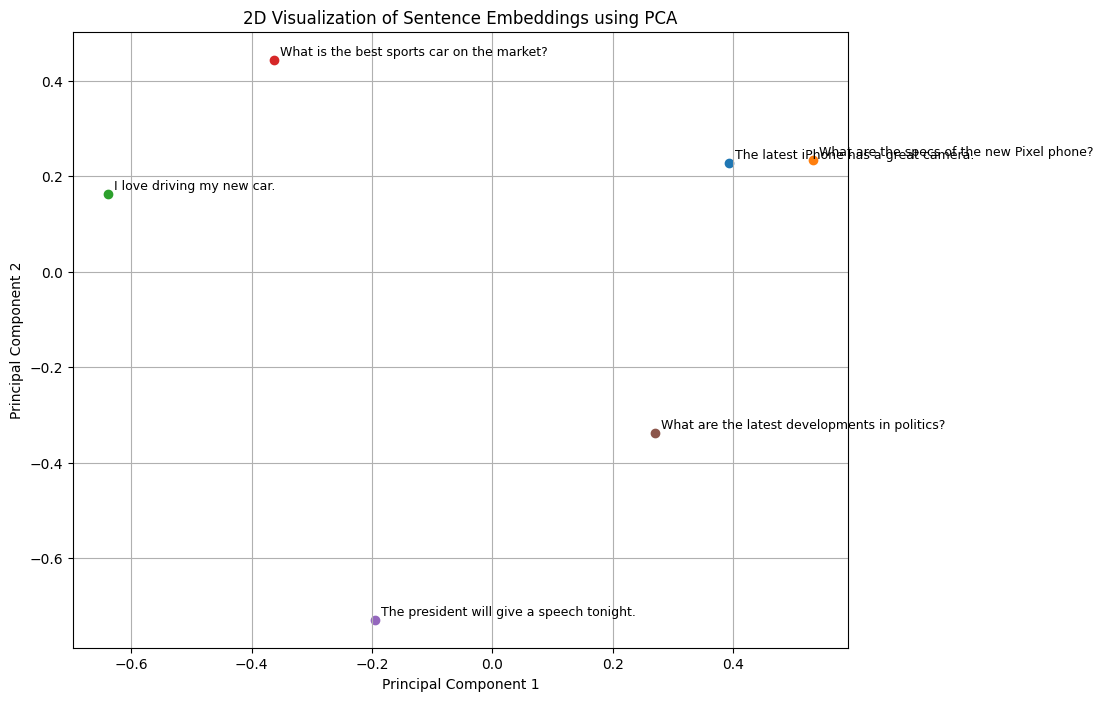

In [15]:
# show the power of the embeddings created.  takes a few example sentences, reduced their high-dimensional vectors down to 2d using PCA and plots them on a graph
# A few example sentences to visualize
example_sentences = [
    "The latest iPhone has a great camera.",
    "What are the specs of the new Pixel phone?",
    "I love driving my new car.",
    "What is the best sports car on the market?",
    "The president will give a speech tonight.",
    "What are the latest developments in politics?"
]

# Generate embeddings for the example sentences
example_embeddings = embed_text(example_sentences)

# Reduce the dimensionality of the embeddings to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(example_embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(10, 8))
for i, sentence in enumerate(example_sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, label=sentence)
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=9)

plt.title('2D Visualization of Sentence Embeddings using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Indexing with FAISS

With our documents now represented as vectors, the next step is to use **FAISS** (Facebook AI Similarity Search) for efficient similarity searching.

***

### Creating a FAISS Index

First, we determine the dimension of our vectors from `X_use` using `X_use.shape[1]`. We then create a FAISS index using `faiss.IndexFlatL2(dimension)`. The `IndexFlatL2` index is specifically designed for **L2 distance** (Euclidean distance). Finally, we add our document vectors to this index with `index.add(X_use)`, which creates a searchable space for our vectors.

***

### Choosing the Right Index

For this project, we've chosen `IndexFlatL2` for its simplicity and effectiveness with small to medium-sized datasets. However, FAISS offers a variety of indexes tailored for different use cases and dataset sizes. For larger datasets or more advanced applications, you might consider other indexes like `IndexIVFFlat` or `IndexIVFPQ` which offer faster search times and reduced memory usage. More information can be found on the FAISS indexes wiki.

This block creates the simplest type of FAISS index, IndexFlatL2. It takes the high-dimensional vectors we created and organizes them for searching. IndexFlatL2 performs an exhaustive search, meaning it compares your query vector to every single document vector in the index. This is very accurate but can be slow for very large datasets.

In [16]:
# Get the dimension of the vectors
dimension = X_use.shape[1]

# Create a FAISS index for L2 distance
index = faiss.IndexFlatL2(dimension)

# Add the document vectors to the index
index.add(X_use.astype('float32'))

print(f"Number of documents in the index: {index.ntotal}")

Number of documents in the index: 18846


This block demonstrates a more advanced and efficient index, IndexIVFFlat. Instead of a brute-force search, this index first partitions the vector space into cells (here, nlist=100) and then, during a search, only looks inside a few of the most promising cells (nprobe=10). This is much faster for large datasets, with a very small trade-off in accuracy.

In [17]:
# Number of cells to partition the vector space into
nlist = 100

# The 'quantizer' is a coarse index that helps to find the right cells
quantizer = faiss.IndexFlatL2(dimension)

# Create the IndexIVFFlat index
ivf_index = faiss.IndexIVFFlat(quantizer, dimension, nlist, faiss.METRIC_L2)

# Train the index on the document vectors
ivf_index.train(X_use.astype('float32'))

# Add the vectors to the index
ivf_index.add(X_use.astype('float32'))

print(f"Number of documents in the IVF index: {ivf_index.ntotal}")

# You can adjust the number of cells to search to balance speed and accuracy
ivf_index.nprobe = 10 # Search 10 closest cells

Number of documents in the IVF index: 18846


# Querying with FAISS

Now we will use FAISS to perform semantic searches on our indexed documents. This process involves defining a search function, executing a query, and then displaying the most relevant results.

***

### Defining the Search Function

A `search` function is created to find documents that are **semantically similar** to a given query. Here's a breakdown of what the function does:

1.  **Preprocesses the Query:** It first cleans the user's query using the `preprocess_text` function to maintain consistency.
2.  **Vectorizes the Query:** The cleaned query is then converted into a vector using the `embed_text` function.
3.  **Searches with FAISS:** The function uses the FAISS index to find the 'k' nearest neighbors to the query's vector. It returns both the distances and the indices of these neighbors.

***

### Executing a Query and Displaying Results

We can now execute a query, for example, "motorcycle," on our search engine. The `search` function returns the indices of the documents in our index that are most similar to the query. For each result, the following information is displayed:

* The **ranking** of the result, based on its distance from the query.
* The **distance value**, which indicates how close the document is to the query vector.
* The **actual text** of the document, showing both the preprocessed and original versions for comparison.

This process demonstrates the practical application of our semantic search engine. The results are not just based on keyword matching, but on **contextual relevance**, showing how the engine interprets and responds to natural language queries.

In [18]:
# Function to perform a query using the Faiss index
def search(query_text, k=5):
    # Preprocess the query text
    preprocessed_query = preprocess_text(query_text)
    # Generate the query vector
    query_vector = embed_text([preprocessed_query])
    # Perform the search on the index
    distances, indices = index.search(query_vector.astype('float32'), k)
    return distances, indices

# --- Example Queries ---
queries = [
    "space exploration",
    "computer graphics and algorithms",
    "discussions on religion and atheism",
    "the best car for a student"
]

for query_text in queries:
    print(f"\n--- Query: '{query_text}' ---\n")
    distances, indices = search(query_text)

    # Display the results
    for i, idx in enumerate(indices[0]):
        print(f"Rank {i+1}: (Distance: {distances[0][i]:.4f})")
        print(f"Original Post:\n{documents[idx]}\n")
        print("-"*80)


--- Query: 'space exploration' ---

Rank 1: (Distance: 1.0956)
Original Post:
From: kjenks@gothamcity.jsc.nasa.gov
Subject: Re: Why not give $1 billion to first year-long moon residents?
Organization: NASA/JSC/GM2, Space Shuttle Program Office 
X-Newsreader: TIN [version 1.1 PL8]
Lines: 17

Gene Wright (gene@theporch.raider.net) wrote:
: Announce that a reward of $1 billion would go to the first corporation 
: who successfully keeps at least 1 person alive on the moon for a year. 
: Then you'd see some of the inexpensive but not popular technologies begin 
: to be developed. THere'd be a different kind of space race then!

I'm an advocate of this idea for funding Space Station work, and I
throw around the $1 billion figure for that "reward."  I suggest that
you increase the Lunar reward to about $3 billion.

This would encourage private industry to invest in space, which 
should be one of NASA's primary goals.

-- Ken Jenks, NASA/JSC/GM2, Space Shuttle Program Office
      kjenks@goth